In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/drive/MyDrive/Lasset Dataset/Lasset_zip.zip', 'r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/Lasset Dataset')

In [ ]:
!pip install tensorflow==1.14
!pip install keras==1.12
!pip install opencv-python
!pip install numpy as np
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement keras==1.12 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.10.0rc0)
ERROR: No matching distribution found for keras==1.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os



In [ ]:
img = image.load_img('/content/drive/MyDrive/Lasset Dataset/Lasset/test/good/0.jpg')

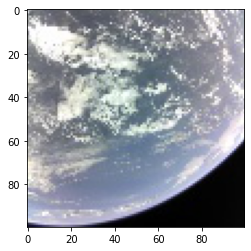

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread('/content/drive/MyDrive/Lasset Dataset/Lasset/test/good/0.jpg')

array([[[179, 174, 171],
        [168, 163, 160],
        [136, 131, 128],
        ...,
        [192, 177, 175],
        [186, 171, 169],
        [194, 179, 176]],

       [[226, 221, 218],
        [125, 122, 118],
        [110, 105, 102],
        ...,
        [211, 196, 194],
        [175, 160, 157],
        [182, 170, 166]],

       [[144, 141, 137],
        [101, 100,  96],
        [115, 112, 108],
        ...,
        [178, 165, 163],
        [191, 179, 175],
        [182, 171, 167]],

       ...,

       [[218, 205, 203],
        [241, 226, 224],
        [250, 232, 231],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[ 71,  50,  52],
        [ 95,  73,  75],
        [120,  93,  96],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[ 38,  14,  16],
        [ 41,  14,  17],
        [ 44,  13,  16],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7]]

In [ ]:
cv2.imread('/content/drive/MyDrive/Lasset Dataset/Lasset/test/good/0.jpg').shape

(100, 100, 3)

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Lasset Dataset/Lasset/train', target_size=(100,100), batch_size=64, 
class_mode = 'binary')

Found 58849 images belonging to 2 classes.


In [ ]:
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/Lasset Dataset/Lasset/valid', target_size=(100,100), batch_size=64, 
class_mode = 'binary')

Found 1419 images belonging to 2 classes.


In [ ]:
test_dataset = '/content/drive/MyDrive/Lasset Dataset/Lasset/test/good'

In [ ]:
train_dataset.class_indices

{'bad': 0, 'good': 1}

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),1, activation = 'relu', input_shape = (100,100,3)),
                                                           tf.keras.layers.MaxPool2D(2,2),
                                                           tf.keras.layers.Conv2D(16,(3,3), activation = 'relu'), tf.keras.layers.MaxPool2D(2,2),
                                                           tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'), tf.keras.layers.MaxPool2D(2,2),
                                                           tf.keras.layers.Flatten(),
                                                           tf.keras.layers.Dense(256, activation = 'relu'),
                                                           tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr = 0.001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.fit = model.fit(train_dataset, steps_per_epoch=10, epochs=300, validation_data=validation_dataset)

Epoch 1/300
10/10 [==============================] - 436s 43s/step - loss: 1.0503 - accuracy: 0.5469 - val_loss: 0.6570 - val_accuracy: 0.6237
Epoch 2/300
10/10 [==============================] - 421s 42s/step - loss: 0.6729 - accuracy: 0.5953 - val_loss: 0.6817 - val_accuracy: 0.5574
Epoch 3/300
 1/10 [==>...........................] - ETA: 6:27 - loss: 0.6254 - accuracy: 0.6250

KeyboardInterrupt: ignored

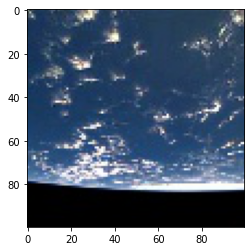

good


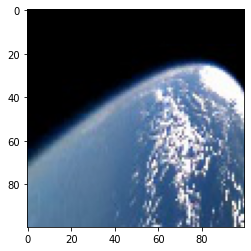

good


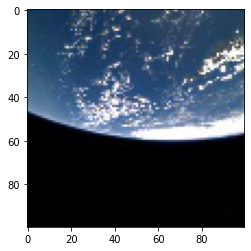

bad


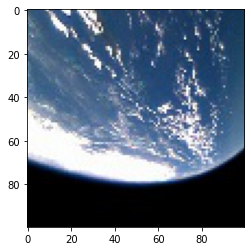

good


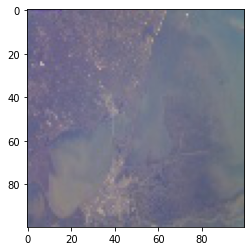

good


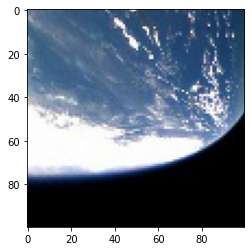

good


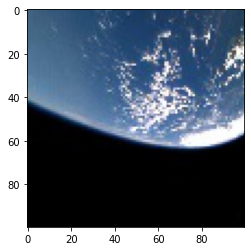

bad


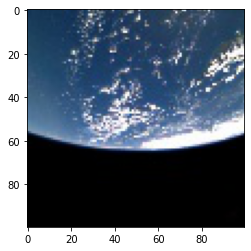

bad


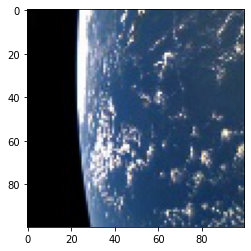

bad


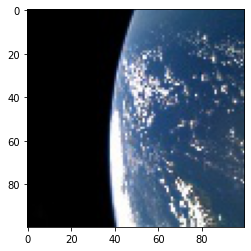

good


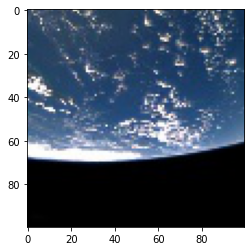

bad


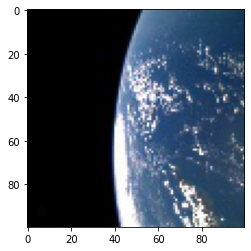

good


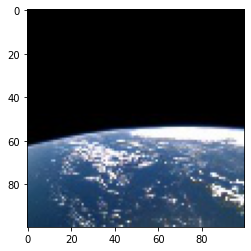

bad


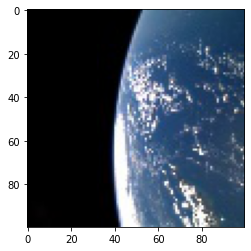

good


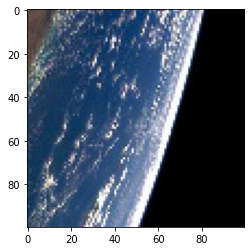

good


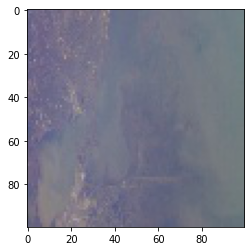

bad


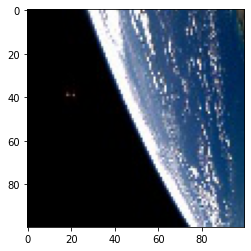

bad


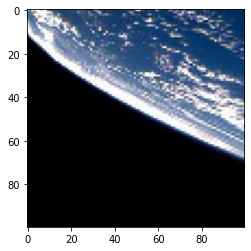

bad


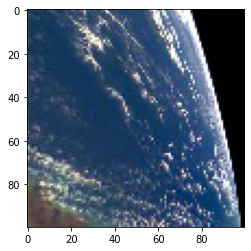

good


KeyboardInterrupt: ignored

In [ ]:
dir_path = '/content/drive/MyDrive/Lasset Dataset/Lasset/test/good'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//' + i, target_size=(100,100))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis = 0)
  images = np.vstack([X])
  val = model.predict(images)

  if val == 1:
    print('good')

  else:
    print('bad')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/Lasset Dataset', 'lassetmain.h5'))

In [ ]:
test = test_dataset
scores=model.evaluate(train_dataset)
print(scores)

920/920 [==============================] - 223s 242ms/step - loss: 0.6941 - acc: 0.5011
[0.694132019125897, 0.50106204]
